<a href="https://colab.research.google.com/github/chenjingen-jane/project-1/blob/main/Internal_Project_Group_3_(Credit_Card_Fraud).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
credit_card_df = pd.read_csv("creditcard_2023.csv")

In [ ]:
class_counts = credit_card_df['Class'].value_counts()
print(class_counts)

Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
missing_values = credit_card_df.isnull().sum().sum()
print(f"{missing_values} Missing values")

duplicates = credit_card_df.duplicated().sum()
print(f"{duplicates} Duplicates")

credit_card_df.drop('id', axis=1, inplace=True)

print(f"\nNew Shape After Cleaning: {credit_card_df.shape}")

0 Missing values
0 Duplicates

New Shape After Cleaning: (568630, 30)


In [ ]:
credit_card_df.groupby("Class").describe().T

Class                     0              1
V1     count  284315.000000  284315.000000
       mean        0.505761      -0.505761
       std         0.823780       0.899890
       min        -3.495584      -2.637662
       25%        -0.137680      -0.987457
...                     ...            ...
Amount min        50.120000      50.010000
       25%      6034.540000    6074.640000
       50%     11996.900000   12062.450000
       75%     18040.265000   18033.780000
       max     24039.930000   24039.930000

[232 rows x 2 columns]

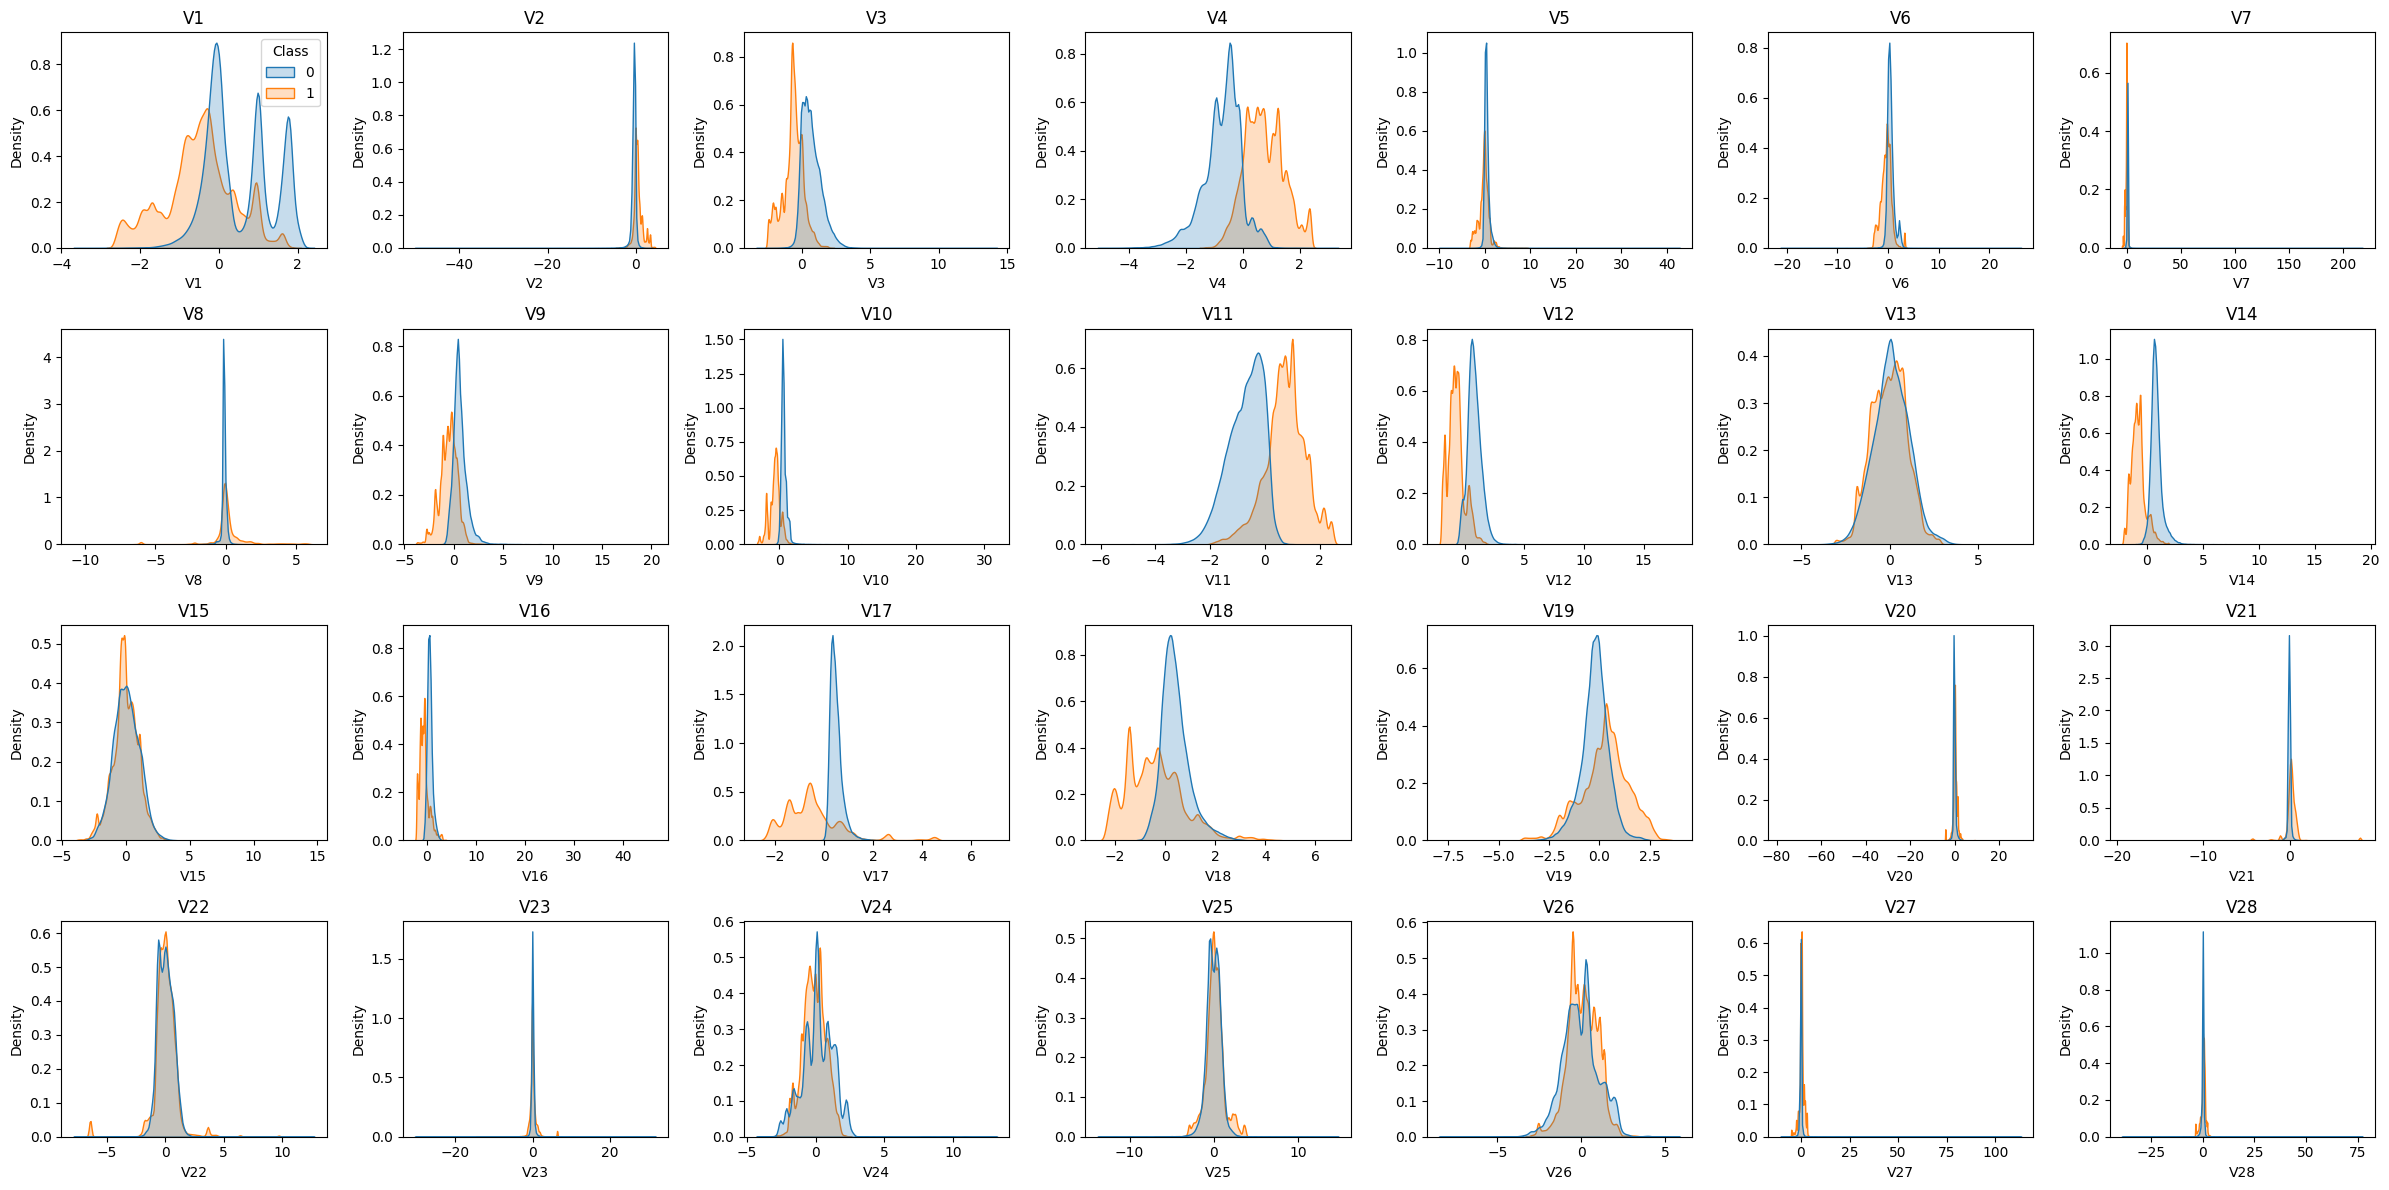

In [ ]:
features = [col for col in credit_card_df.columns if col.startswith("V")]

fig, axes = plt.subplots(4, 7, figsize=(24, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(
        data=credit_card_df,
        x=col,
        hue="Class",
        ax=axes[i],
        fill=True,
        common_norm=False,
        legend=(i == 0)
    )
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

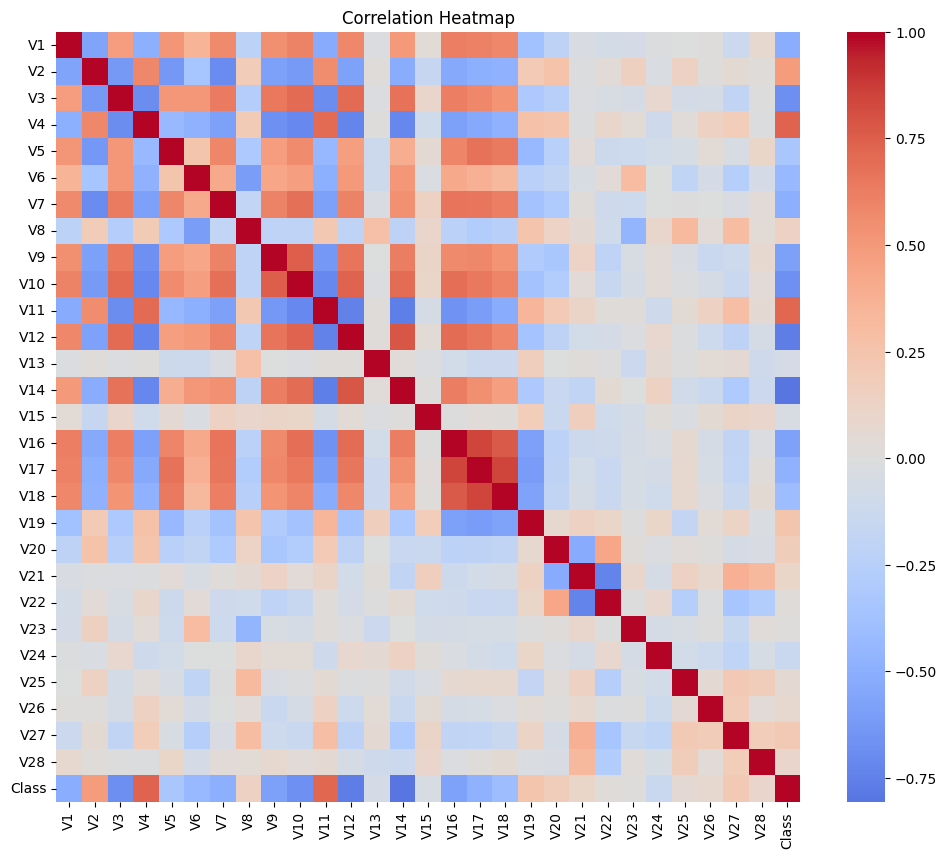

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(credit_card_df[features + ["Class"]].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

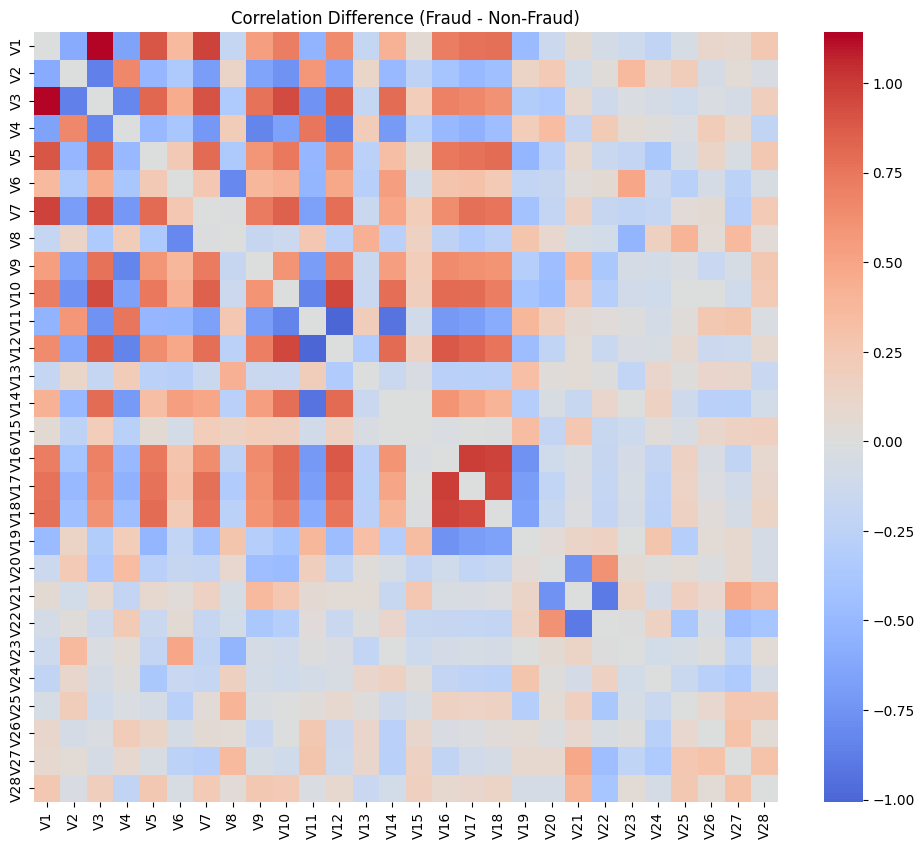

In [ ]:
fraud_corr = credit_card_df[credit_card_df["Class"]==1][features].corr()
nonfraud_corr = credit_card_df[credit_card_df["Class"]==0][features].corr()
corr_diff = fraud_corr - nonfraud_corr

plt.figure(figsize=(12,10))
sns.heatmap(corr_diff, cmap="coolwarm", center=0)
plt.title("Correlation Difference (Fraud - Non-Fraud)")
plt.show()

In [ ]:
importance_scores = corr_diff.abs().sum(axis=1)
importance_ranked = importance_scores.sort_values(ascending=False)

pd.DataFrame({
    "Feature": importance_ranked.index,
    "Correlation_Difference_Score": importance_ranked.values
})

,Feature,Correlation_Difference_Score
0,V3,13.215989
1,V10,13.089119
2,V12,12.983935
3,V7,12.414526
4,V17,12.109052
5,V16,12.003771
6,V1,11.800583
7,V11,11.722775
8,V5,11.627696
9,V9,11.606788
